In [1]:
%tensorflow_version 2.x

import tensorflow as tf 

from tensorflow.keras.datasets import  fashion_mnist
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense , Flatten

import numpy as np
import PIL.Image as image
import matplotlib.pylab as plt

TensorFlow 2.x selected.


In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

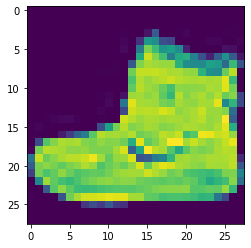

In [3]:
plt.imshow(train_images[0])
plt.show()

In [0]:
train_images = train_images / 255
test_images = test_images / 255

In [5]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_Description = ['T-shirt', 'Trouser', '	Pullover', '	Dress', '	Coat', '	Sandal', '	Shirt', 'Sneaker', '	Bag', '	Ankle boot' ]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


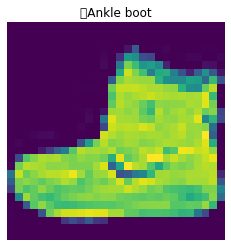

In [7]:
plt.imshow(train_images[0])
plt.title(class_Description[train_labels[0]])
plt.axis('off')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


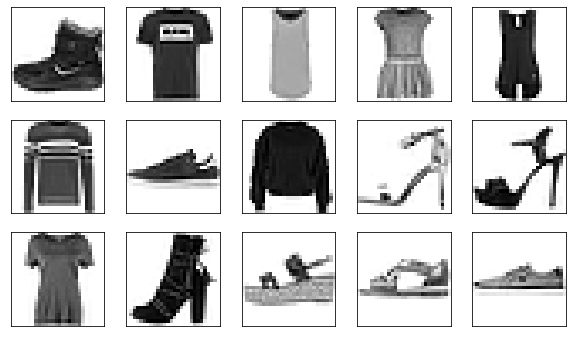

In [8]:
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_Description[train_labels[i]], color='w')
plt.show()

In [0]:
# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(1024, activation='relu'),
#     Dense(512, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 1,494,154
Trainable params: 1,494,154
Non-trainable params: 0
____________________________________________

In [17]:
# history = model.fit(train_images, 
#           train_labels, 
#           validation_split=0.3,
#           epochs=10
#           )
history = model.fit(train_images, train_labels, validation_split=0.3,epochs=10)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 134us/sample - loss: 0.5195 - accuracy: 0.8131 - val_loss: 0.4223 - val_accuracy: 0.8475
Epoch 2/10
42000/42000 [==============================] - 5s 126us/sample - loss: 0.3928 - accuracy: 0.8571 - val_loss: 0.4057 - val_accuracy: 0.8555
Epoch 3/10
42000/42000 [==============================] - 5s 124us/sample - loss: 0.3470 - accuracy: 0.8721 - val_loss: 0.3735 - val_accuracy: 0.8648
Epoch 4/10
42000/42000 [==============================] - 5s 125us/sample - loss: 0.3194 - accuracy: 0.8826 - val_loss: 0.3538 - val_accuracy: 0.8767
Epoch 5/10
42000/42000 [==============================] - 5s 125us/sample - loss: 0.3020 - accuracy: 0.8883 - val_loss: 0.3482 - val_accuracy: 0.8703
Epoch 6/10
42000/42000 [==============================] - 5s 130us/sample - loss: 0.2857 - accuracy: 0.8939 - val_loss: 0.3309 - val_accuracy: 0.8773
Epoch 7/10
42000/42000 [==========================

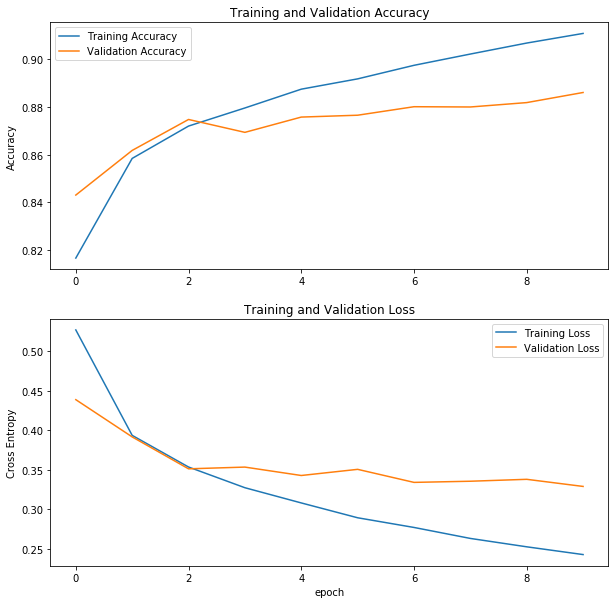

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),0.7])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
# plt.ylim([0.5,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()







In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_Description[predicted_label],
                                100*np.max(predictions_array),
                                class_Description[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

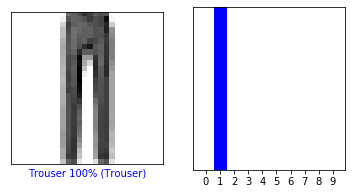

In [41]:
import random 

i = random.randrange(0, 101, 1) 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()